# Report - COVID19 papers (CORD-19)

In [1]:
# Itamar Fradkin - 312531064
# Ron Boxer - 321219008

first you need to download the files from [Here](https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge)<br>
<b>Note-</b> 
After downloading the zip file - <br>
Unzip - metadata.csv & pdf_json folder (Keep the sturcted folder((document_parses)).<br>
Insert this files into 'data' folder & create new folder named- 'minidataset' in 'document_parses' folder

We created several utilits which can be found in 'utils' folder. 

let`s load and take a look on the metadata.

In [2]:
import json
import os
import cotools
import shutil
import pandas as pd
import numpy as np

In [3]:
DATASET_PATH = 'data/'
METADATA_PATH = 'data/metadata.csv'
MINI_DATASET_JSON_PATH = 'data/document_parses/minidataset'

In [4]:
import utils.dataset as ut
df = ut.load_metadata()

C:\Users\ronbo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
df

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
sha,,,,,,,,,,,,,,,,,,
d7ea1370848eac2a4e421c20fc30a69dfa69566e,9w762whh,Elsevier; PMC; WHO,Patients With Myocarditis Associated With COVI...,10.1016/j.jacc.2022.02.004,PMC8958986,NaN,els-covid,NaN,2022-04-05,"Rosner, Carolyn M.; Atkins, Melany; Saeed, Ibr...",Journal of the American College of Cardiology,NaN,NaN,NaN,document_parses/pdf_json/d7ea1370848eac2a4e421...,NaN,https://doi.org/10.1016/j.jacc.2022.02.004; ht...,247765405.0
e4494dc889fcaadde2f5c0fcf401e7e8a3d96a63,6ltgimq0,Elsevier; Medline; PMC; WHO,Electrochemical immunosensor for rapid and hig...,10.1016/j.talanta.2022.123211,PMC8730781,3.49993e+07,no-cc,A label-free electrochemical biosensing approa...,2022-04-01,"Mehmandoust, Mohammad; Gumus, Z. Pinar; Soylak...",Talanta,NaN,NaN,NaN,document_parses/pdf_json/e4494dc889fcaadde2f5c...,document_parses/pmc_json/PMC8730781.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34999319/;...,245704928.0
12bc48af0b3196eef7e887807130b8553e8d7190,vmsyu6w7,Elsevier; Medline; PMC; WHO,Entrepreneurial Interventions for crisis manag...,10.1016/j.ijdrr.2022.102830,PMC8865137,3.5229e+07,no-cc,This article investigates both the negative an...,2022-04-01,"Krishnan, Commander S. Navaneetha; Ganesh, L.S...",Int J Disaster Risk Reduct,NaN,NaN,NaN,document_parses/pdf_json/12bc48af0b3196eef7e88...,document_parses/pmc_json/PMC8865137.xml.json,https://doi.org/10.1016/j.ijdrr.2022.102830; h...,246523637.0
fea63a0a7eb45059214491c2cb894f7a98b5f65c,tx49s7f8,Medline; PMC; WHO,A Qualitative Examination of COVID-19’s Impact...,10.1177/08901171211053845,PMC8851044,3.4787e+07,no-cc,PURPOSE: The COVID-19 pandemic is correlated w...,2022-03-31,"Brannon, Grace Ellen; Mitchell, Sophia; Ray, M...",Am J Health Promot,NaN,NaN,NaN,document_parses/pdf_json/fea63a0a7eb4505921449...,NaN,https://doi.org/10.1177/08901171211053845; htt...,244385128.0
631cf2b3762bf36ecfe686765b08cbc34351fbd9,aagrsfeh,Elsevier; PMC; WHO,Population Mobility and Socioeconomic Indicato...,10.1016/j.ijid.2021.12.061,PMC8884814,NaN,els-covid,Purpose To explore the extent that socioeconom...,2022-03-31,"Marwah, A.; Feldman, J.; Moineddin, R.; Thomas...",International Journal of Infectious Diseases,NaN,NaN,NaN,document_parses/pdf_json/631cf2b3762bf36ecfe68...,NaN,https://api.elsevier.com/content/article/pii/S...,247159475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cbd8c8f742fb5a032e1b041da900a8a51623cc79,htwp70hc,Medline; PMC; WHO,Comparison of chest CT severity scoring system...,10.1007/s00330-021-08432-5,PMC8760133,3.50318e+07,no-cc,PURPOSE: To compare the diagnostic performance...,2022-01-15,"Elmokadem, Ali H.; Mounir, Ahmad M.; Ramadan, ...",Eur Radiol,NaN,NaN,NaN,document_parses/pdf_json/cbd8c8f742fb5a032e1b0...,document_parses/pmc_json/PMC8760133.xml.json,https://doi.org/10.1007/s00330-021-08432-5; ht...,245937675.0
5bacfca63b11318e9788197ca3005a1135138956,4jqcl0ny,PMC,Regarding the articles on home spirometry,10.1016/j.jcf.2022.01.002,PMC8760931,35042654,no-cc,NaN,2022-01-15,"Curley, Rachael; Campbell, Michael J; Walters,...",J Cyst Fibros,NaN,NaN,NaN,document_parses/pdf_json/5bacfca63b11318e97881...,document_parses/pmc_json/PMC8760931.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN
637abda16edb7c7245861431108ff8f25aeea80f,7221cj12,Medline; PMC,Missed opportunities to identify cryptococcosi...,10.1177/20499361211066363,PMC8771738,3.50703e+07,cc-by-nc,SARS-CoV-2 may activate both innate and adapti...,2022-01-15,"Chastain, Daniel B.; Henao-Martínez, Andrés F....",Ther Adv Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/637abda16edb7c7245861...,document_parses/pmc_json/PMC8771738.xml.json,https://doi.org/10.1177/20499361211066363; htt...,246078031.0


As we only need some of the data, we move a small cohort into an entirely separate folder. (It will take a while :))

In [6]:
ut.move_files(df)

Now we will use outsource package - ['cord-19-tools'](https://pypi.org/project/cord-19-tools/) to help us load the papers effitiantly.

In [7]:
pip install cord-19-tools

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Load papers
import cotools
data = cotools.Paperset(MINI_DATASET_JSON_PATH)

In [9]:
covid_df = ut.load_papers_into_df(data, size=20000)
covid_df.head()

,title,paper_id,abstract,body_text
0,Recruitment methods and yield rates in a clini...,000e6f401f0f46b240cc81f2c9ef41914bfb9e06,Background: Although the prevalence of hyperte...,The prevalence of hypertension is increasing w...
1,Impact of the COVID-19 Pandemic on Daily Life:...,0012308e8c02792b907c31935868f1afbff2c59b,"Using a mixed methods design, this study aimed...",travel restrictions. These measures aimed to p...
2,Colchicine Against SARS-CoV-2 Infection: What ...,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,Coronavirus disease 2019 caused by the severe ...,Systemic inflammation is the hallmark of coron...
3,Use and misuse of prescription stimulants by u...,001716d1b1c1e9d9c1c8b3751e620371f2ddf2d4,Background: Misuse of prescription stimulants ...,"Global Drug Survey, an increase of neuroenhanc..."
4,A Neural Phillips Curve and a Deep Output Gap,001746ab8ab396aa3a7bc6b45ba75f26ec860fa9,Many problems plague the estimation of Phillip...,Few equations are as central to modern macroec...


##### Part A - Paper Similarity using gzip as our compresing method on text data only

Normalized compression distance (NCD) is a way of measuring the similarity between two objects, be it two documents, two letters, two emails, two music scores, two languages, two programs, two pictures, two systems, two genomes, to name a few. Such a measurement should not be application dependent or arbitrary. A reasonable definition for the similarity between two objects is how difficult it is to transform them into each other. [Further information can be found on this blog post](https://medium.com/@kanvaly/normalized-compression-distance-d8698bc650b4)

If two objects compress better together than separately, it means they
share common patterns and are similar!! <br>
here is the formula- 

![NCD Formula](img/NCD.png)

Let's take a paper as an example. Calculate the NCD distance to all other papers and take the 10 closest papers.

In [10]:
import utils.model as model
paper_id = '88b80f02e54d2ed8c9f05f422b45f4810a6a405b' # Example
k = 10
similarity_df = model.k_similar_papers(paper_id, k, covid_df,txt_to_encode='abstract')
similarity_df

,title,paper_id,abstract,body_text,ncd_distance
14448,Explainable machine learning to predict long-t...,88b80f02e54d2ed8c9f05f422b45f4810a6a405b,Background: Machine learning (ML) model is inc...,The long-term outcome is currently an emerging...,0.037691
14255,Comparative analysis of explainable machine le...,8710f527c4706f1ae42013a4d7688b1ec03f73aa,Background: Machine learning (ML) holds the pr...,"underlying structure of the data, while ML mod...",0.777518
2529,Prediction of 3-year risk of diabetic kidney d...,18a795e30445a0f4ab3eb1be1198a805deb0e1fa,Background: Established prediction models of D...,clinical decision-making. Understanding the ri...,0.795195
9839,Predicting the necessity of oxygen therapy in ...,5d6ad19f8d11971024d1b7a4a23e6cd7378cd15b,Medical oxygen is a critical element in the tr...,"Since the spread of COVID-19 in December 2019,...",0.805654
9625,Article 852736 1 (2022) A Promising Preoperati...,5b9d41960cd05dbc62122130019030e29f1b4ae2,Background: The non-invasive preoperative diag...,Hepatocellular carcinoma (HCC) is one of the m...,0.807205
10705,Mortality Predictive Value of APACHE II and SO...,6621c2bde72488b15a577d92fb8613a77461266b,Background. COVID-19 pandemic has become a glo...,"In December 2019, severe acute respiratory syn...",0.813725
5295,Journal Pre-proofs Can we reliably automate cl...,32d17d06540281827e8a013e51f98e953e7f114f,Background: Building Machine Learning (ML) mod...,What was already known on the topic:  Classic...,0.818610
14952,Predicting ionized hypocalcemia: External vali...,8dd1465054a2ef6c952fedf0ed9af361ea1a38ef,Background: Ionized hypocalcemia is common in ...,New York City was the epicenter of the COVID-1...,0.824499
15770,Early changes in laboratory tests predict live...,959423993ae9a583d8f26edf1842128dc086ae06,Background: Most patients with coronavirus dis...,. Studies have shown that COVID-19 can affect ...,0.828033
8813,Comparing different machine learning technique...,53d8d480246f79239ebc56e87c0384a8085ba514,Background: Coronavirus disease 2019 (COVID-19...,Coronavirus disease 2019 (COVID-19) has been a...,0.828685


In this example, we found some similar papers using the comparison method. our paper was in the field of machine learning 
From the results, we can see that we got papers in the field of machine learning are also represented.

##### Part B - Clustering using Compression method from Part A

Our idea is to make several features based on the compression method. we saw in part A that actually, we can get some similar papers based on this method. so we decided to enrich the idea and create 3 features based on compression on the title, paper body text, and abstract text. we think this logic will find clusters with similar papers.

In [11]:
import gzip

def compress(x):
    x = str(x).encode()
    l_x = len(gzip.compress(x))
    return l_x


# Apply Compression method from Part A
train = covid_df.copy()
train['comp_title'] = train['title'].apply(compress)
train['comp_body'] = train['body_text'].apply(compress)
train['comp_abstract'] = train['abstract'].apply(compress)

In [12]:
# Pre- prossece before clustering - Normalization
from sklearn.preprocessing import StandardScaler , MinMaxScaler

normalizer = MinMaxScaler()
paper_ids =  covid_df['paper_id']
train = train[['paper_id','comp_title','comp_body','comp_abstract']]
train['comp_title'] = normalizer.fit_transform(train[['comp_title']])
train['comp_body'] = normalizer.fit_transform(train[['comp_body']])
train['comp_abstract'] = normalizer.fit_transform(train[['comp_abstract']])       
train

,paper_id,comp_title,comp_body,comp_abstract
0,000e6f401f0f46b240cc81f2c9ef41914bfb9e06,0.135011,0.026254,0.075546
1,0012308e8c02792b907c31935868f1afbff2c59b,0.092677,0.050131,0.030028
2,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,0.069794,0.027313,0.050121
3,001716d1b1c1e9d9c1c8b3751e620371f2ddf2d4,0.127002,0.036918,0.055819
4,001746ab8ab396aa3a7bc6b45ba75f26ec860fa9,0.050343,0.141596,0.166362
...,...,...,...,...
26979,ffeb944868a31900fb661d78835ae1b22655fb22,0.137300,0.021210,0.072404
26980,ffeba2e1ac4c562c93da63f732f73cea26327793,0.081236,0.031219,0.047636
26986,fff951fc332133ecdffe8506d630494b552b126b,0.077803,0.049735,0.010156
26988,fffacb29c594a89c2e2db9a844a496c540ad913c,0.148741,0.022383,0.000658


##### Choose optimal K  - Elbow method

In [13]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# run kmeans with many different k
distortions = []
K = range(2, 17)

data = train[['comp_title','comp_body','comp_abstract']]

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(data)
    k_means.fit(data)
    distortions.append(sum(np.min(cdist(data, k_means.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

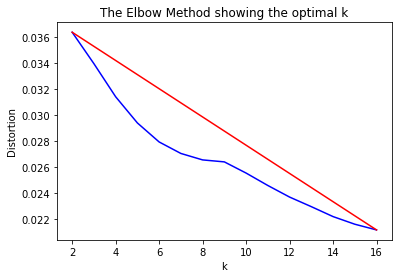

In [14]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Final Clustering  K= 5

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
 
#predict the labels of clusters.
label = kmeans.fit_predict(train[['comp_title','comp_body','comp_abstract']])

##### Visualizatoion

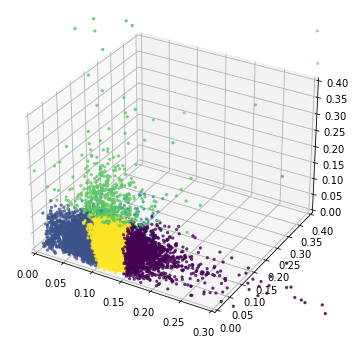

In [16]:
import matplotlib.pyplot as plt
import numpy as np 


fig = plt.figure(1, figsize=(25, 6))
ax = plt.axes(projection = '3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], marker='.', c = label)
plt.xlim([0, 0.3])
plt.ylim([0, 0.4])
ax.set_zlim(0, 0.4);

Looks like a good separation

#####  Analysis

In order to see if the clusters actually presenting similar papers we will take the example from part A and check if they are in the same cluster.

In [17]:
example_paper = '88b80f02e54d2ed8c9f05f422b45f4810a6a405b'
example_paper_raw_data = train[train['paper_id'] == example_paper]
predicted_cluster_example_paper = kmeans.predict(example_paper_raw_data[['comp_title','comp_body','comp_abstract']])[0]
counter = 0 

for similar_paper in similarity_df['paper_id'].values[1:]:
    paper_raw_data = train[train['paper_id'] == similar_paper]
    paper_raw_data = paper_raw_data[['comp_title','comp_body','comp_abstract']]
    paper_pridiction = kmeans.predict(paper_raw_data)
    if paper_pridiction == predicted_cluster_example_paper:
        counter += 1
counter

7

Wow! Seven out of ten were in the same cluster. In addition, we saw in Part A an example paper in the field of machine learning. therefore,  This cluster seems to represent a good collection of papers in the field of machine learning.

#####  Furhter Work

Based only on the compression method and using only text data in this work, we got pretty good results. For future work, we would like to add some more methods, such as word embedding (DOC2VEC), and create a model that incorporates both methods and more metadata features. Using this approach, we believe that we will achieve better performance and similarity.